# Visualizing the Amazon Dataset

In [10]:
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

This notebook is ranned on Google Colab, hence we have to manually install `torch_geomtric`.

In [11]:
!pip install torch_geometric
from torch_geometric.datasets import Amazon # Importing our dataset

In [12]:
dataset = Amazon(name="Computers", root='./data/Amazon')

In [13]:
print("Number of graphs:", len(dataset))
print("Number of features", dataset.num_features)
print("Number of classes:", dataset.num_classes)
print("Type:", type(dataset))

Number of graphs: 1
Number of features 767
Number of classes: 10
Type: <class 'torch_geometric.datasets.amazon.Amazon'>


In [14]:
# Get our graph
data = dataset[0]
print("Graph:", data)


Graph: Data(x=[13752, 767], edge_index=[2, 491722], y=[13752])


In [15]:
# Note: That features are a bag of words
print("Shape of a element:", data.x.shape)
print(data.x)

Shape of a element: torch.Size([13752, 767])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [1., 1., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 1., 0.,  ..., 1., 1., 0.]])


In [16]:
# Display how many nodes belong to each of the class labels (y)
unique, counts = torch.unique(data.y, return_counts=True)
print(unique)
print(counts)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([ 436, 2142, 1414,  542, 5158,  308,  487,  818, 2156,  291])


In [17]:
from torch_geometric.utils import to_networkx
import networkx as nx

# Treat our graph as undirected and display the number of disconnected components
G = to_networkx(data, to_undirected=True)
num_components = nx.number_connected_components(G)
print("Number of disjoint components:", num_components)

Number of disjoint components: 314


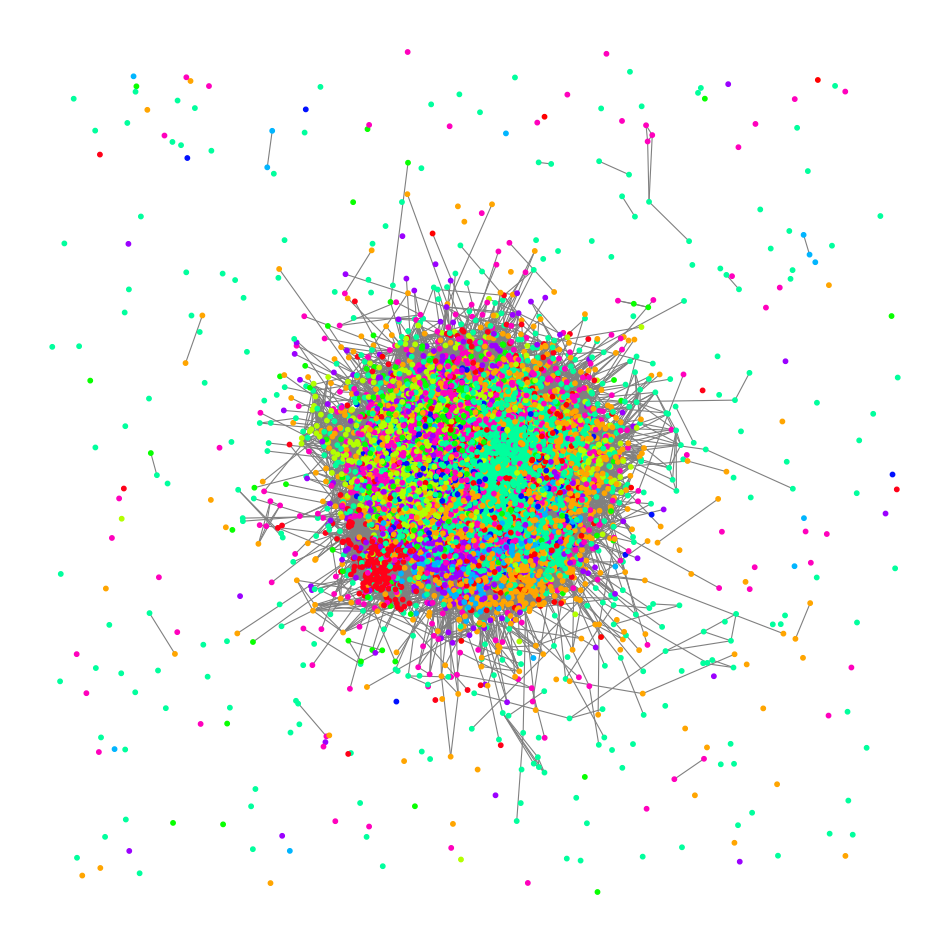

In [18]:
# Plot the amazon graph (Note: It takes a ~10 min to run)
plt.figure(figsize=(12,12))
plt.axis('off')
nodes = nx.draw_networkx(
    G,
    pos=nx.spring_layout(G),
    node_size=10,
    node_color=data.y,
    cmap="hsv",
    vmin=data.y.min(),
    vmax=data.y.max(),
    width=0.8,
    edge_color="grey",
    labels=True,
    with_labels=False # Disable so no labels are drawn on the nodes
)
